In [18]:
from sklearn.naive_bayes import GaussianNB 
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt
import math
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import tree

In [2]:
data = pd.read_csv('MovieProfanity.csv')

In [3]:
data

,Film,Genre,Year,Rated,Released,Runtime,Metascore,imdbRating,imdbVotes,imdbID,BoxOffice,A,B,D,F,S
0,A Monkey in Winter,Comedy,1962.0,NaN,31-Jan-63,105.0,NaN,7.6,2.0,tt0056636,NaN,0,0,0,0,0
1,Airplane II: The Sequel,Sci-Fi,1982.0,PG,10-Dec-82,85.0,48.0,6.2,47.0,tt0083530,NaN,1,0,7,2,4
2,Blast from the Past,Romance,1999.0,PG-13,12-Feb-99,112.0,48.0,6.6,57.0,tt0124298,NaN,3,6,12,4,6
3,"Bodies, Rest & Motion",Romance,1993.0,R,9-Apr-93,95.0,NaN,5.7,2.0,tt0106447,NaN,3,0,0,19,19
4,Boondock Saints ii: All Saints Day,Thriller,2009.0,R,11-Dec-09,118.0,24.0,6.3,60.0,tt1300851,NaN,20,7,4,115,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1160,The X-Files: Fight the Future,Sci-Fi,1998.0,NaN,10/13/1998,27.0,NaN,7.4,358.0,tt0365474,NaN,3,0,2,1,4
1161,Transformers: The Movie,Animation,1986.0,PG,8/8/1986,84.0,NaN,7.3,36621.0,tt0092106,NaN,0,0,2,0,0
1162,Wall-E,Animation,2008.0,G,6/27/2008,98.0,95.0,8.4,967549.0,tt0910970,223749872.0,0,0,0,0,0
1163,White Christmas,Musical,1954.0,Not Rated,11/15/1954,120.0,NaN,7.6,31174.0,tt0047673,NaN,0,0,0,0,0


In [4]:
#Normalizing based on Runtime
data['APM'] = data['A']/data['Runtime']
data['BPM'] = data['B']/data['Runtime']
data['DPM'] = data['D']/data['Runtime']
data['FPM'] = data['F']/data['Runtime']
data['SPM'] = data['S']/data['Runtime']

#Swears per minute

In [75]:
#Look at the relationship between profanity and the rating whilst considering secondary factors that might section 
#Behavior such as year and genre. 

#Step 1 - subset necessary columns. 
#and clean up 
rating = data[['Film','Genre','Year','Rated','A','B','D','F','S', 'APM','BPM','DPM','FPM','SPM']]
rating = rating.dropna()
rating.loc[rating['Rated'].isin(['NOT RATED', 'Passed', 'Unrated', 'PASSED','Approved']),'Rated'] = 'Not Rated'
rating.loc[rating['Rated'].isin(['TV-PG']),'Rated'] = 'PG'
rating.loc[rating['Rated'].isin(['TV-G']),'Rated'] = 'G'
rating.loc[rating['Rated'].isin(['TV-14']),'Rated'] = 'PG-13'
rating.loc[rating['Rated'].isin(['TV-MA','M','NC-17']),'Rated'] = 'R'

In [76]:
rating['Rated'].unique()

array(['PG', 'PG-13', 'R', 'Not Rated', 'G'], dtype=object)

In [79]:
rating[rating['Rated'] == 'R']

,Film,Genre,Year,Rated,A,B,D,F,S,APM,BPM,DPM,FPM,SPM
3,"Bodies, Rest & Motion",Romance,1993.0,R,3,0,0,19,19,0.031579,0.000000,0.000000,0.200000,0.200000
4,Boondock Saints ii: All Saints Day,Thriller,2009.0,R,20,7,4,115,55,0.169492,0.059322,0.033898,0.974576,0.466102
9,Evil Dead II,Horror,1987.0,R,0,3,2,0,1,0.000000,0.035714,0.023810,0.000000,0.011905
10,Freddy's Dead: The Final Nightmare,Mystery,1991.0,R,3,3,2,10,17,0.033708,0.033708,0.022472,0.112360,0.191011
11,Fright Night,Horror,2011.0,R,5,1,7,3,3,0.047170,0.009434,0.066038,0.028302,0.028302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1153,The White Ribbon,Mystery,2009.0,R,0,0,2,0,0,0.000000,0.000000,0.013889,0.000000,0.000000
1154,The Wild Bunch,Western,1969.0,R,4,4,27,0,0,0.029630,0.029630,0.200000,0.000000,0.000000
1156,The Wolf of Wall Street,Crime,2013.0,R,13,5,5,180,36,0.072222,0.027778,0.027778,1.000000,0.200000
1157,The Woodsman,Drama,2004.0,R,7,1,5,26,15,0.080460,0.011494,0.057471,0.298851,0.172414


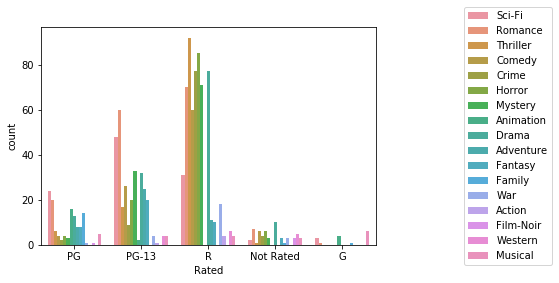

In [9]:
rating

g = sns.countplot(x = 'Rated', hue = 'Genre', data = rating)
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

In [62]:
rating = rating[rating['Rated'] != 'Not Rated']

In [10]:
#With Year 
y = rating['Rated']
# X = rating[['A','B','D','F','S']] #40% 
# X = rating[['APM','BPM','DPM','FPM','SPM']] #39%
# X = rating[['Year','A','B','D','F','S']] #47.5%
# X = rating[['Year','APM','BPM','DPM','FPM','SPM']] #46%
# X = rating[['APM','BPM','DPM','FPM','SPM','Genre']] #26% 60%
# X = rating[['A','B','D','F','S','Genre']] #37.7% 61%
# X = rating[['APM','BPM','DPM','FPM','SPM','Genre','Year']] #34.6% 62%
X = rating[['A','B','D','F','S','Genre','Year']] #41.7% 63%

X = pd.concat([pd.get_dummies(X['Genre']), X], axis = 1)
X = X.drop(['Genre'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .8, random_state=42)

gnb = GaussianNB().fit(X_train, y_train) 
gnb_predictions = gnb.predict(X_test) 

accuracy = gnb.score(X_test, y_test) 
print(accuracy)

cm = confusion_matrix(y_test, gnb_predictions) 
print(cm)

0.4177777777777778
[[ 2  1  0  0  0]
 [ 2  8  0  2  0]
 [ 8  8  2  4  3]
 [ 3 23  1 17 12]
 [ 1 52  0 11 65]]


Best accuracy of  0.6577777777777778  occurs at  21


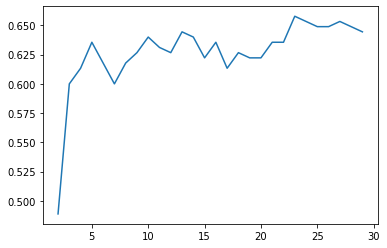

In [11]:
from sklearn.neighbors import KNeighborsClassifier 

y = rating['Rated']
# X = rating[['A','B','D','F','S']] #66%
# X = rating[['APM','BPM','DPM','FPM','SPM']] #65%
# X = rating[['Year','A','B','D','F','S']] #72%
# X = rating[['Year','APM','BPM','DPM','FPM','SPM']] #63%
X = rating[['APM','BPM','DPM','FPM','SPM','Genre']] #65.7% 73.7%
# X = rating[['A','B','D','F','S','Genre']] #65.7% 69.9%
# X = rating[['APM','BPM','DPM','FPM','SPM','Genre','Year']] #64.8% 65.7%
# X = rating[['A','B','D','F','S','Genre','Year']] #72.7%

X = pd.concat([pd.get_dummies(X['Genre']), X], axis = 1)
X = X.drop(['Genre'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .8, random_state=42)

nlist = []
for n in range(2,30):
    knn = KNeighborsClassifier(n_neighbors = n).fit(X_train, y_train)
    accuracy = knn.score(X_test, y_test) 
    nlist.append(accuracy)

sns.lineplot(x = range(2,30), y = nlist)
nlist.index(np.max(nlist))
print("Best accuracy of ", np.max(nlist), " occurs at ", nlist.index(np.max(nlist)))

In [72]:
y = rating['Rated']
# X = rating[['A','B','D','F','S']] #65.3% 67.6
# X = rating[['APM','BPM','DPM','FPM','SPM']] #64% 66.6
# X = rating[['Year','A','B','D','F','S']] #66.7% 71.8
# X = rating[['Year','APM','BPM','DPM','FPM','SPM']] #68.8% 70.9
# X = rating[['APM','BPM','DPM','FPM','SPM','Genre']] #61.7% 71.4%
# X = rating[['A','B','D','F','S','Genre']] #62.7% 69%
# X = rating[['APM','BPM','DPM','FPM','SPM','Genre','Year']] #66.2% 75.1%
X = rating[['A','B','D','F','S','Genre','Year']] #67% 75.6%

X = pd.concat([pd.get_dummies(X['Genre']), X], axis = 1)
X = X.drop(['Genre'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .8, random_state=42)

clfCART = DecisionTreeClassifier(max_depth = 4, min_samples_split = math.ceil(len(y_train)*.1))
clfCART.fit(X_train, y_train)
sum(clfCART.predict(X_test) == y_test)/len(y_test)

0.755868544600939

In [58]:
clfCART.classes_

array(['G', 'Not Rated', 'PG', 'PG-13', 'R'], dtype=object)

In [73]:
rating

,Film,Genre,Year,Rated,A,B,D,F,S,APM,BPM,DPM,FPM,SPM
1,Airplane II: The Sequel,Sci-Fi,1982.0,PG,1,0,7,2,4,0.011765,0.000000,0.082353,0.023529,0.047059
2,Blast from the Past,Romance,1999.0,PG-13,3,6,12,4,6,0.026786,0.053571,0.107143,0.035714,0.053571
3,"Bodies, Rest & Motion",Romance,1993.0,R,3,0,0,19,19,0.031579,0.000000,0.000000,0.200000,0.200000
4,Boondock Saints ii: All Saints Day,Thriller,2009.0,R,20,7,4,115,55,0.169492,0.059322,0.033898,0.974576,0.466102
5,Complete Guide to Guys,Comedy,2005.0,PG-13,2,0,0,0,10,0.024096,0.000000,0.000000,0.000000,0.120482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1157,The Woodsman,Drama,2004.0,R,7,1,5,26,15,0.080460,0.011494,0.057471,0.298851,0.172414
1158,The World is not Enough,Adventure,1999.0,PG-13,1,0,1,0,0,0.007812,0.000000,0.007812,0.000000,0.000000
1159,The Wrestler,Drama,2008.0,R,19,2,4,41,23,0.174312,0.018349,0.036697,0.376147,0.211009
1161,Transformers: The Movie,Animation,1986.0,PG,0,0,2,0,0,0.000000,0.000000,0.023810,0.000000,0.000000


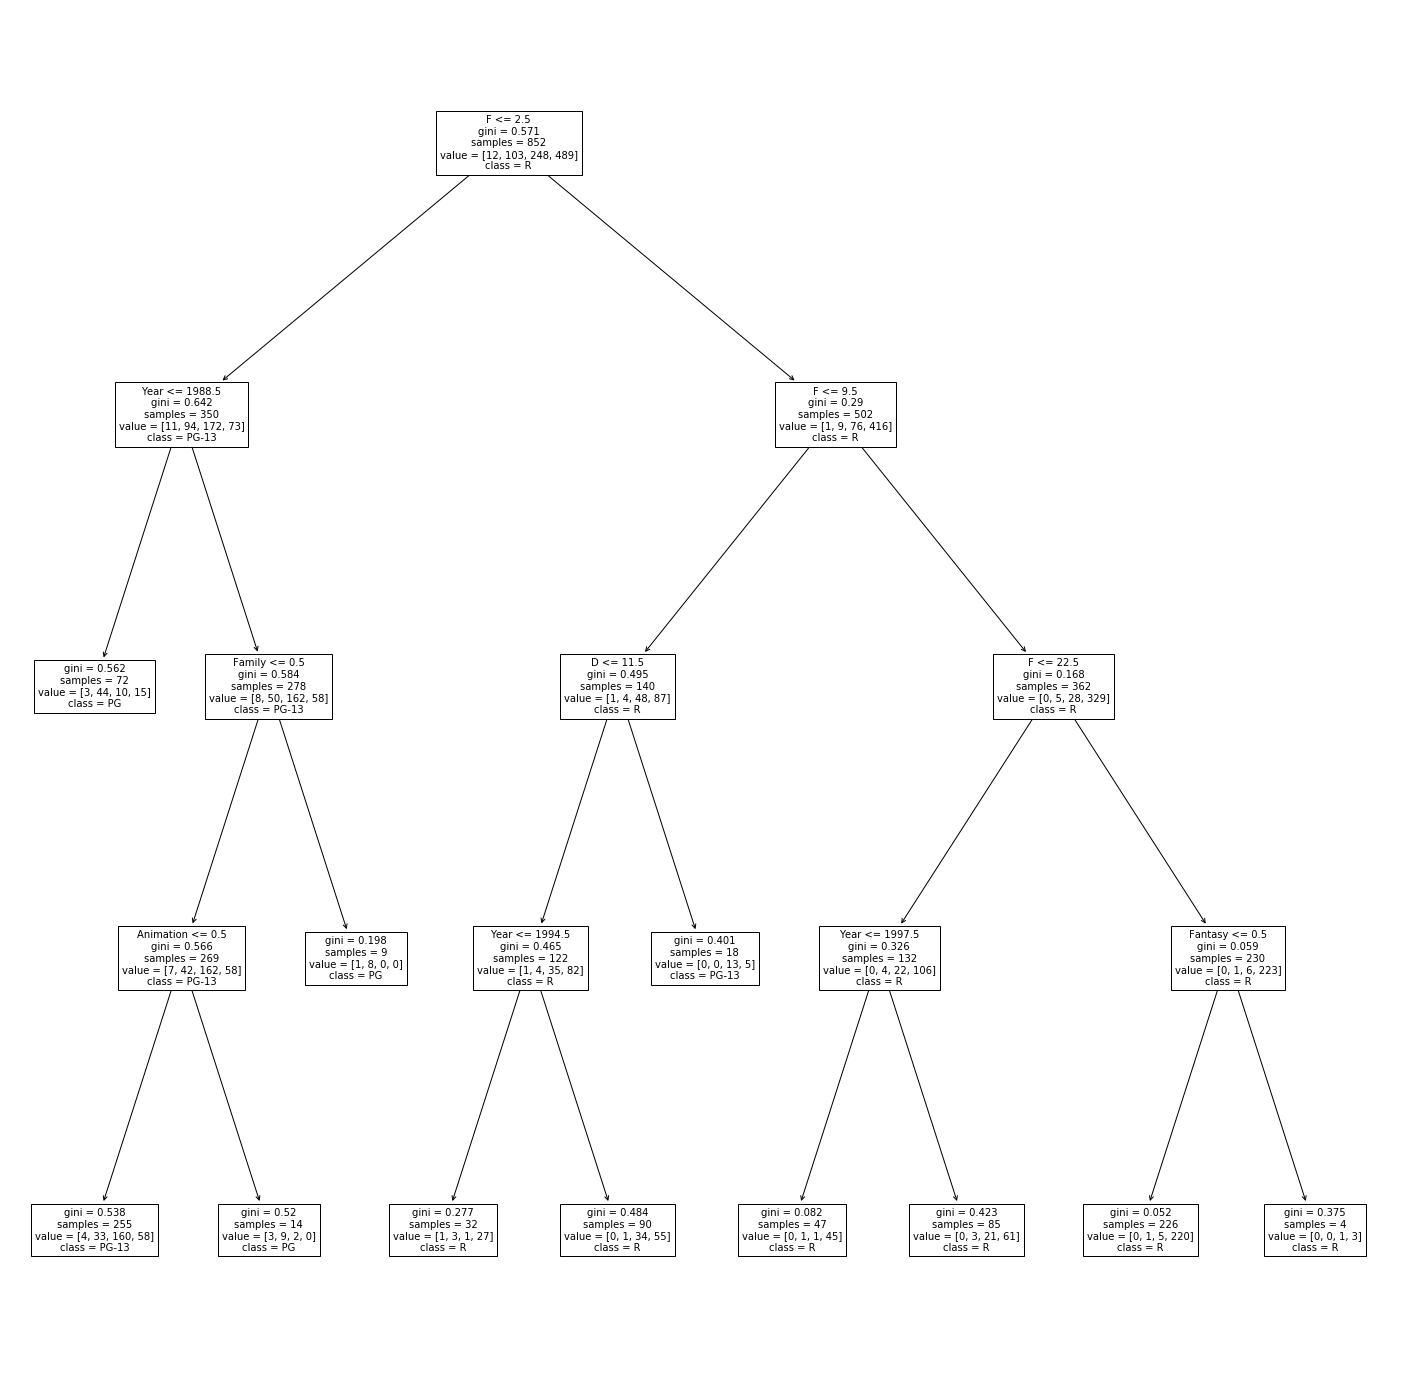

In [74]:
fig, ax = plt.subplots(figsize=(25, 25))
tree.plot_tree(clfCART, feature_names = X.columns, class_names = clfCART.classes_, max_depth=4, fontsize=10)
plt.savefig('UnratedOut.png',bbox_inches='tight')

In [45]:
y = rating['Rated']
# X = rating[['A','B','D','F','S']] #63.5%
# X = rating[['APM','BPM','DPM','FPM','SPM']] #64.8
# X = rating[['Year','A','B','D','F','S']] #68%
# X = rating[['Year','APM','BPM','DPM','FPM','SPM']] #68.8%
# X = rating[['APM','BPM','DPM','FPM','SPM','Genre']] #67.1% 70.1%
# X = rating[['A','B','D','F','S','Genre']] #65.3% 74.1%
X = rating[['APM','BPM','DPM','FPM','SPM','Genre','Year']] #72.4% 77.4%
# X = rating[['A','B','D','F','S','Genre','Year']] #71.5% 77.4%

X = pd.concat([pd.get_dummies(X['Genre']), X], axis = 1)
X = X.drop(['Genre'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .8, random_state=42)

clfRF = RandomForestClassifier(max_depth=9, min_samples_split = math.ceil(len(y_train)*.1), random_state=0)
clfRF.fit(X_train, y_train)
sum(clfRF.predict(X_test) == y_test)/len(y_test)

0.7746478873239436